### Classification with MNIST Dataset and ResNet network
This script sets up a ResNet-style network to classify digits from the MNIST dataset.

In [1]:
import keras
import keras.backend as K
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Add, Activation, Dropout
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


Use a Keras utility function to load the MNIST dataset.  We select only zeros and ones to do binary classification.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

Resize the images to vectors and convert their datatype and range.

In [3]:
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train*2.-1.
x_test = x_test*2.-1.

Build a multi-class classifier model.

In [4]:
def res_block(x,c,s=1):
    if K.shape(x)[3] <> c or s <> 1:
        x_save = Conv2D(c,1,strides=s,activation=None)(x)
    else:
        x_save = x
    x = Conv2D(c,3,strides=s,padding='same',activation='relu',kernel_initializer='he_normal')(x)
    x = Conv2D(c,3,padding='same',activation=None,kernel_initializer='he_normal')(x)
    x = Add()([x,x_save])
    x = Activation('relu')(x)
    return x

x_in = Input((28,28,1))

x = res_block(x_in,64,2)
x = res_block(x,64)

x = res_block(x,128,2)
x = res_block(x,128)

x = res_block(x,256,2)
x = res_block(x,256)

x = Flatten()(x)
x = Dense(200,kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)
x = Dense(10,activation='softmax',kernel_initializer='he_normal')(x)
model = Model(inputs=x_in,outputs=x)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 14, 14, 64)    640         input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                (None, 14, 14, 64)    36928       conv2d_2[0][0]                   
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 14, 14, 64)    128         input_1[0][0]                    
___________________________________________________________________________________________

Set up the model to optimize the categorical crossentropy loss using stochastic gradient descent.

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Optimize the model over the training data.

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 44s - loss: 0.3635 - acc: 0.8831 - val_loss: 0.0851 - val_acc: 0.9725
Epoch 2/20
60000/60000 [==============================] - 42s - loss: 0.1030 - acc: 0.9686 - val_loss: 0.0563 - val_acc: 0.9805
Epoch 3/20
60000/60000 [==============================] - 42s - loss: 0.0728 - acc: 0.9771 - val_loss: 0.0444 - val_acc: 0.9848
Epoch 4/20
60000/60000 [==============================] - 42s - loss: 0.0545 - acc: 0.9833 - val_loss: 0.0408 - val_acc: 0.9858
Epoch 5/20
60000/60000 [==============================] - 42s - loss: 0.0436 - acc: 0.9864 - val_loss: 0.0367 - val_acc: 0.9872
Epoch 6/20
60000/60000 [==============================] - 42s - loss: 0.0358 - acc: 0.9888 - val_loss: 0.0359 - val_acc: 0.9881
Epoch 7/20
60000/60000 [==============================] - 42s - loss: 0.0291 - acc: 0.9908 - val_loss: 0.0344 - val_acc: 0.9881
Epoch 8/20
60000/60000 [==============================

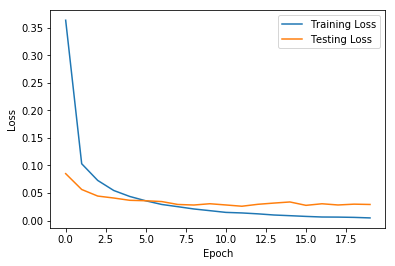

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

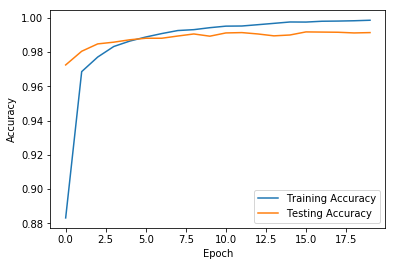

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()